<a href="https://colab.research.google.com/github/naphatsiri/DADS5001-Miniproject/blob/main/dads5001_mini_project_update_240967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import data and read data imformation

filepath = 'https://raw.githubusercontent.com/naphatsiri/DADS5001-Miniproject/refs/heads/main/socio-eco%20and%20gdp%20per%20capita%20(merged).csv'
df_socio = pd.read_csv(filepath)

df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                3269 non-null   object 
 1   Country Code                3269 non-null   object 
 2   Region                      3269 non-null   object 
 3   Year                        3269 non-null   int64  
 4   Life Expectancy World Bank  3269 non-null   float64
 5   Health Expenditure %        3269 non-null   float64
 6   Education Expenditure %     3269 non-null   float64
 7   Unemployment                3269 non-null   float64
 8   gdp per capita              3227 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 230.0+ KB


In [3]:
df_socio.head()

,Country Name,Country Code,Region,Year,Life Expectancy World Bank,Health Expenditure %,Education Expenditure %,Unemployment,gdp per capita
0,Afghanistan,AFG,South Asia,2001,56.3080,5.892352,4.371465,10.809000,NaN
1,Angola,AGO,Sub-Saharan Africa,2001,47.0590,4.483516,4.371465,4.004000,527.333529
2,Albania,ALB,Europe & Central Asia,2001,74.2880,7.139524,3.458700,18.575001,1281.659826
3,Andorra,AND,Europe & Central Asia,2001,72.1685,5.865939,4.371465,5.920000,22970.512210
4,United Arab Emirates,ARE,Middle East & North Africa,2001,74.5440,2.484370,4.371465,2.493000,31280.755860


In [4]:
#Clean data process : Select only numerical columns when calculating the median
df_socio.fillna(df_socio.select_dtypes(include='number').median(), inplace=True)

df_socio.head()

,Country Name,Country Code,Region,Year,Life Expectancy World Bank,Health Expenditure %,Education Expenditure %,Unemployment,gdp per capita
0,Afghanistan,AFG,South Asia,2001,56.3080,5.892352,4.371465,10.809000,4444.816511
1,Angola,AGO,Sub-Saharan Africa,2001,47.0590,4.483516,4.371465,4.004000,527.333529
2,Albania,ALB,Europe & Central Asia,2001,74.2880,7.139524,3.458700,18.575001,1281.659826
3,Andorra,AND,Europe & Central Asia,2001,72.1685,5.865939,4.371465,5.920000,22970.512210
4,United Arab Emirates,ARE,Middle East & North Africa,2001,74.5440,2.484370,4.371465,2.493000,31280.755860


In [5]:
#Check data again after fillna witn median on gdp per capita column

df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                3269 non-null   object 
 1   Country Code                3269 non-null   object 
 2   Region                      3269 non-null   object 
 3   Year                        3269 non-null   int64  
 4   Life Expectancy World Bank  3269 non-null   float64
 5   Health Expenditure %        3269 non-null   float64
 6   Education Expenditure %     3269 non-null   float64
 7   Unemployment                3269 non-null   float64
 8   gdp per capita              3269 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 230.0+ KB


In [6]:
#Part1_Global : Install ploty
!pip install plotly.express==0.4.1

In [7]:
#Part1 Global : Life expectancy (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Life Expectancy World Bank",
                    color_continuous_scale="Viridis",
                    range_color=(0, 90),
                    scope="world",
                    title="Global Life Expectancy (year) "
                   )
fig.show()

In [8]:
#Part1 Global : Healthcare expenditure (ค่าใช้จ่ายด้านสุขภาพ) (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Health Expenditure %",
                    color_continuous_scale="Viridis",
                    range_color=(0, 30),
                    scope="world",
                    title="Global Health Expenditure (%)"
                   )
fig.show()

In [12]:
#Part1 Global : Education Expenditure % (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Education Expenditure %",
                    color_continuous_scale="Viridis",
                    range_color=(0, 10),
                    scope="world",
                    title="Global Education Expenditure (%)"
                   )
fig.show()

In [13]:
#Part1 Global :  Unemployment (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Unemployment",
                    color_continuous_scale="Viridis",
                    range_color=(0, 30),
                    scope="world",
                    title="Global Unemployment Rate (%)"
                   )
fig.show()

In [14]:
#Part2 Thailand vs Global : Bar chart for Life expectancy

# Calculate the global average life expectancy
global_average_life_expectancy = df_socio['Life Expectancy World Bank'].mean()

# Get the life expectancy for Thailand
thailand_life_expectancy = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Life Expectancy World Bank'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Life Expectancy': [thailand_life_expectancy, global_average_life_expectancy]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Life Expectancy',
             title='Comparison of Life Expectancy: Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 100],
             labels={'Life Expectancy': 'Life Expectancy (Years)', 'Country': 'Country'})

fig.update_traces(texttemplate=data['Life Expectancy'].tolist(), textposition='outside')
fig.update_yaxes(dtick=5)
fig.show()

In [16]:
# Filter data for Thailand
thailand_life_expectancy = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Life Expectancy World Bank']]

# Calculate the global average life expectancy over the years
global_average_life_expectancy = df_socio.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_life_expectancy, x='Year', y='Life Expectancy World Bank',
              title='Thailand vs Global Life Expectancy Over Time')

fig.add_scatter(x=thailand_life_expectancy['Year'], y=thailand_life_expectancy['Life Expectancy World Bank'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_life_expectancy['Year'], y=global_average_life_expectancy['Life Expectancy World Bank'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

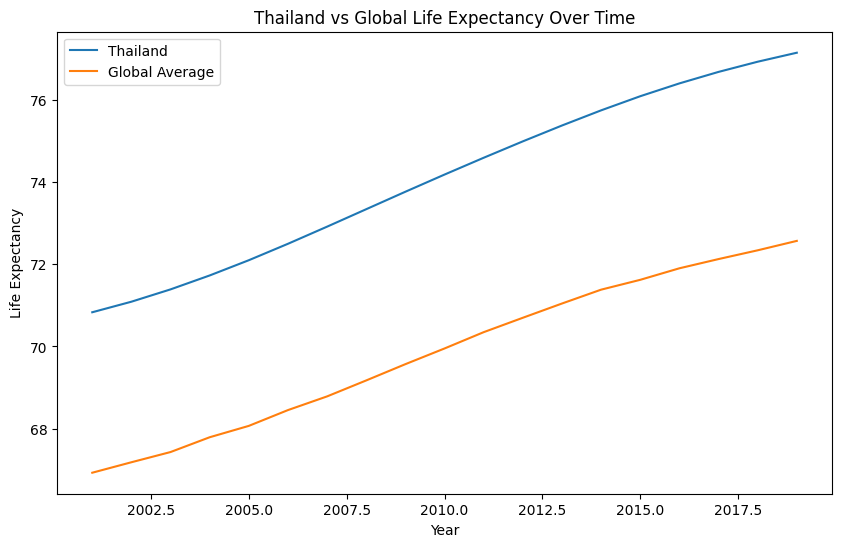

In [24]:
# Filter data for Thailand
thailand_life_expectancy = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Life Expectancy World Bank']]

# Calculate the global average life expectancy over the years
global_average_life_expectancy = df_socio.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()

# Create a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life Expectancy World Bank', data=thailand_life_expectancy, label='Thailand')
sns.lineplot(x='Year', y='Life Expectancy World Bank', data=global_average_life_expectancy, label='Global Average')
plt.title('Thailand vs Global Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

In [17]:
#Part2 Thailand vs Global : Bar chart for Healthcare expenditure

# Calculate the global average healthcare expenditure
global_average_healthcare_expenditure = df_socio['Health Expenditure %'].mean()

# Get the healthcare expenditure for Thailand
thailand_healthcare_expenditure = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Health Expenditure %'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Health Expenditure %': [thailand_healthcare_expenditure, global_average_healthcare_expenditure]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Health Expenditure %',
             title='Comparison of Health Expenditure : Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 10],
             labels={'Health Expenditure %': 'Health Expenditure (%)', 'Country': 'Country'})
fig.show()

In [20]:
# Filter data for Thailand
thailand_health_expenditure = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Health Expenditure %']]

# Calculate the global average life expectancy over the years
global_average_health_expenditure = df_socio.groupby('Year')['Health Expenditure %'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_health_expenditure, x='Year', y='Health Expenditure %',
              title='Thailand vs Global Health Expenditure Over Time')

fig.add_scatter(x=thailand_health_expenditure['Year'], y=thailand_health_expenditure['Health Expenditure %'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_health_expenditure['Year'], y=global_average_health_expenditure['Health Expenditure %'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

In [18]:
#Part2 Thailand vs Global : Bar chart for Education Expenditure

# Calculate the global average Education Expenditure
global_average_education_expenditure = df_socio['Education Expenditure %'].mean()

# Get the Education Expenditure for Thailand
thailand_education_expenditure = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Education Expenditure %'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Education Expenditure %': [thailand_healthcare_expenditure, global_average_healthcare_expenditure]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Education Expenditure %',
             title='Comparison of Education Expenditure : Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 10],
             labels={'Education Expenditure %': 'Education Expenditure (%)', 'Country': 'Country'})


fig.update_traces(texttemplate=data['Education Expenditure %'].tolist(), textposition='outside') #แก้ตัวเลขบนกราฟให้ต่างกัน เพราะตอนนี้ตัวเลขยังเหมือนกัน
fig.update_yaxes(dtick=5)
fig.show()

In [21]:
# Filter data for Thailand
thailand_education_expenditure = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Education Expenditure %']]

# Calculate the global average education expenditure over the years
global_average_education_expenditure = df_socio.groupby('Year')['Education Expenditure %'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_education_expenditure, x='Year', y='Education Expenditure %',
              title='Thailand vs Global Education Expenditure Over Time')

fig.add_scatter(x=thailand_education_expenditure['Year'], y=thailand_education_expenditure['Education Expenditure %'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_education_expenditure['Year'], y=global_average_education_expenditure['Education Expenditure %'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

In [25]:
#Part2 Thailand vs Global : Bar chart for Unemployment rate

# Calculate the global average Unemployment rate
global_average_unemployment_rate = df_socio['Unemployment'].mean()

# Get the Unemployment rate for Thailand
thailand_unemployment_rate = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Unemployment'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Unemployment rate %': [thailand_unemployment_rate, global_average_unemployment_rate]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Unemployment rate %',
             title='Comparison of Unemployment rate  : Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 10],
             labels={'Unemployment rate %': 'Unemployment rate (%)', 'Country': 'Country'})

fig.update_traces(texttemplate=data['Unemployment rate %'].tolist(), textposition='outside') #แก้ตัวเลขบนกราฟให้ต่างกัน เพราะตอนนี้ตัวเลขยังเหมือนกัน
fig.update_yaxes(dtick=5)
fig.show()

In [27]:
# Filter data for Thailand
thailand_unemployment_rate = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Unemployment']]

# Calculate the global average unemployment rate over the years
global_average_unemployment_rate = df_socio.groupby('Year')['Unemployment'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_unemployment_rate, x='Year', y='Unemployment',
              title='Thailand vs Global Unemployment Rate Over Time')

fig.add_scatter(x=thailand_unemployment_rate['Year'], y=thailand_unemployment_rate['Unemployment'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_unemployment_rate['Year'], y=global_average_unemployment_rate['Unemployment'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

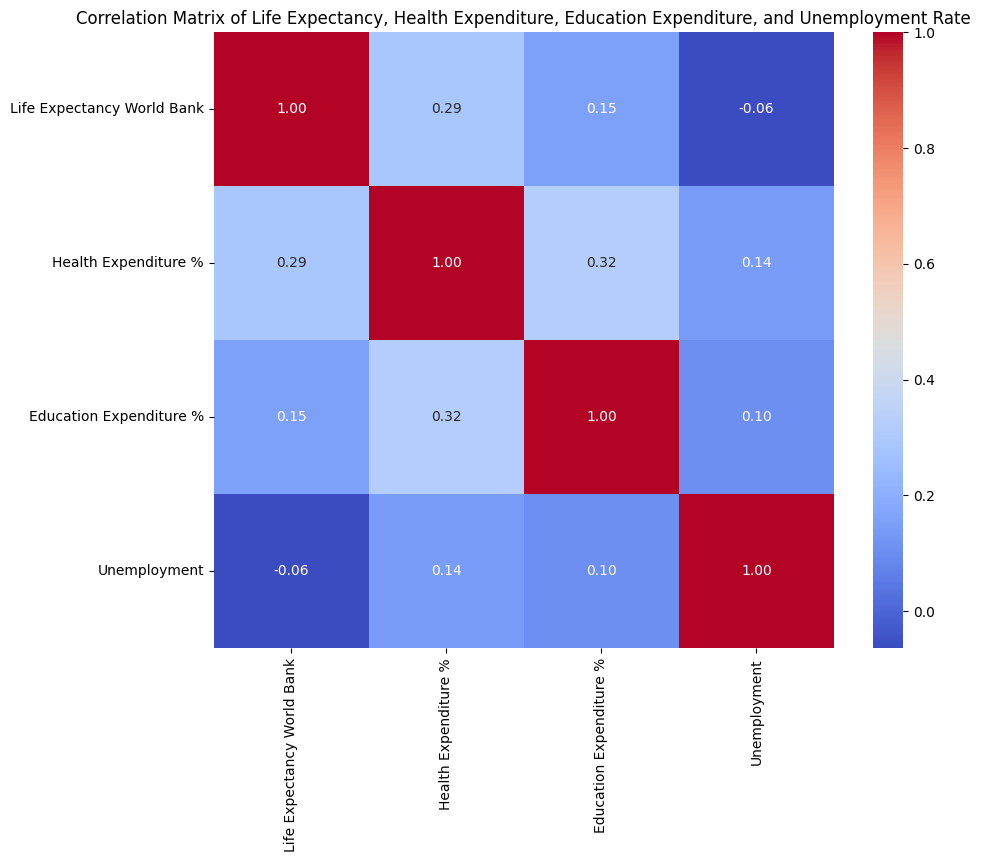

In [28]:
# Select the columns for the correlation matrix
columns = ['Life Expectancy World Bank', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment']
df_corr = df_socio[columns]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Life Expectancy, Health Expenditure, Education Expenditure, and Unemployment Rate')
plt.show()